# Homework 4 Question 2: Bayes, Logistic, KNN

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import ListedColormap

## Divorce

### Import Data

In [2]:
marriage = pd.read_csv("marriage.csv", header = None)
print(marriage.shape)
pred = marriage.T[:-1].T
print(pred.shape)
label = marriage.T[-1:].T
label = np.array(label)
m_label = []
for i in label:
    for x in i:
        m_label.append(float(x))
print(len(m_label))

X_train, X_test, Y_train, Y_test = train_test_split(pred, m_label, train_size=0.80, random_state=500)
print(len(Y_test))

(170, 55)
(170, 54)
170
34


### Train Bayes

In [3]:
def train_bayes(x,y):
    gnb = GaussianNB(var_smoothing = 1e-3)
    return gnb.fit(x, y)
m_bayes = train_bayes(X_train, Y_train)


### Train Logit

In [4]:
def train_log(x,y):
    logit = LogisticRegression()
    return logit.fit(x, y)
m_log = train_log(X_train, Y_train)


### Train KNN

In [5]:
def train_KNN(x, y):
    neigh = KNeighborsClassifier()
    return neigh.fit(x,y)
m_knn = train_KNN(X_train, Y_train)

In [6]:
print("Divorce Naive Bayes Accuracy Score:")
print(m_bayes.score(X_test, Y_test))
print()

print("Divorce Logistic Accuracy Score:")
print(m_log.score(X_test, Y_test))
print()

print("Divorce KNN Accuracy Score:")
print(m_knn.score(X_test, Y_test))

Divorce Naive Bayes Accuracy Score:
0.9705882352941176

Divorce Logistic Accuracy Score:
0.9705882352941176

Divorce KNN Accuracy Score:
0.9705882352941176


### PCA

In [7]:
def train_pca(data):
    pca = decomposition.PCA(2)
    pca.fit(data)
    return pca.transform(data)
X = train_pca(X_train)
print(X.shape)
m_bayes = train_bayes(X, Y_train)
m_log = train_log(X, Y_train)
m_knn = train_KNN(X, Y_train)

def plot_db(x, y, clf, title):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

(136, 2)


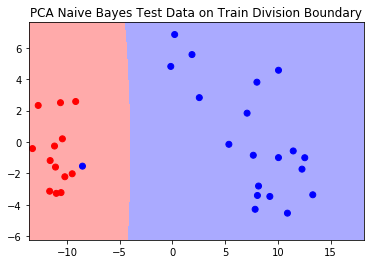

In [8]:
## Plot test data on train division boundary - Bayes
h = .02
X_t = train_pca(X_test)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = m_bayes.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(X_t[:, 0], X_t[:, 1], c=Y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA Naive Bayes Test Data on Train Division Boundary")

plt.show()

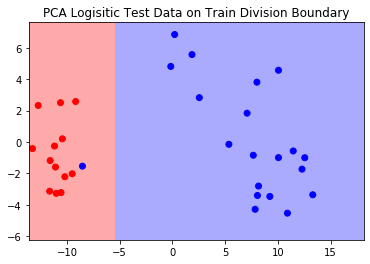

In [9]:
## Plot test data on train division boundary - Logistic
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = m_log.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(X_t[:, 0], X_t[:, 1], c=Y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA Logisitic Test Data on Train Division Boundary")

plt.show()

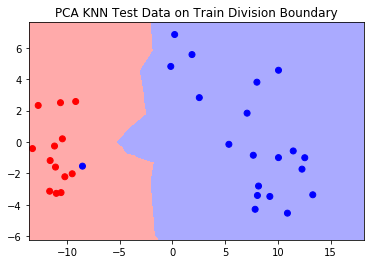

In [10]:
## Plot test data on train division boundary - KNN
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = m_knn.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(X_t[:, 0], X_t[:, 1], c=Y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA KNN Test Data on Train Division Boundary")

plt.show()

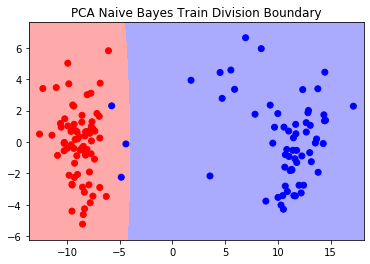

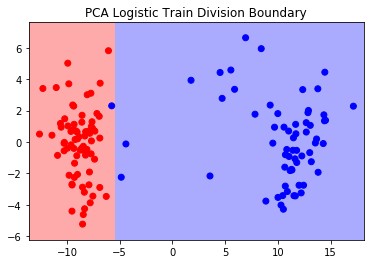

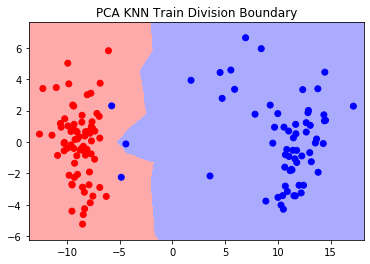

In [11]:
## Plot Train Data
plot_db(X, Y_train, m_bayes, "PCA Naive Bayes Train Division Boundary")
plot_db(X, Y_train, m_log, "PCA Logistic Train Division Boundary")
plot_db(X, Y_train, m_knn, "PCA KNN Train Division Boundary")

### Plot

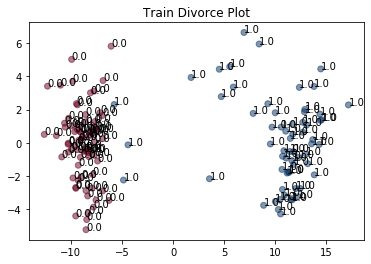

In [12]:
plt.clf()
plt.scatter(X[:, 0], X[:, 1], alpha = .5, c = Y_train, cmap="RdBu")
plt.title("Train Divorce Plot")
for i, val in enumerate(Y_train):
    plt.annotate(val, (X[:, 0][i], X[:, 1][i]))

plt.show()

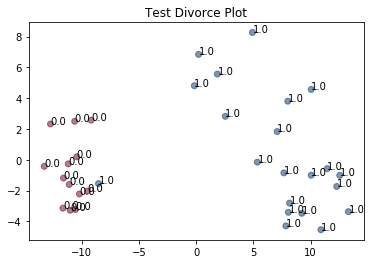

In [13]:
plt.clf()
plt.scatter(X_t[:, 0], X_t[:, 1], alpha = .5, c = Y_test, cmap="RdBu")
plt.title("Test Divorce Plot")
for i, val in enumerate(Y_test):
    plt.annotate(val, (X_t[:, 0][i], X_t[:, 1][i]))

plt.show()

## Handwritten

### Import Data

In [14]:
digits = loadmat('data.mat')['data'].T
d_labels = loadmat('label.mat')['trueLabel'].T

print(digits.shape)
print(d_labels.shape)

labels = []
for i in d_labels:
    for n in i:
        if n == 2:
            labels.append(0.0)
        elif n == 6:
            labels.append(1.0)
print(len(labels))
count_2 = 0
for i in labels:
    if i == 0:
        count_2 += 1
print(count_2)
labels = np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(digits, labels, train_size=0.80, random_state=100)
print(y_train.shape)
print("x:", x_train.shape, x_test.shape)
print("y:", len(y_train), len(y_test))

(1990, 784)
(1990, 1)
1990
1032
(1592,)
x: (1592, 784) (398, 784)
y: 1592 398


### Fit Models

In [15]:
## Bayes
d_bayes = train_bayes(x_train, y_train)
print("Digits Naive Bayes Accuracy Score:")
print(d_bayes.score(x_test, y_test))
print()

## Logistic
d_log = train_log(x_train, y_train)
print("Digits Logistic Accuracy Score:")
print(d_log.score(x_test, y_test))
print()

## KNN
d_knn = train_KNN(x_train, y_train)
print("Digits KNN Accuracy Score:")
print(d_knn.score(x_test, y_test))

Digits Naive Bayes Accuracy Score:
0.9120603015075377

Digits Logistic Accuracy Score:
0.9773869346733668

Digits KNN Accuracy Score:
0.992462311557789


### PCA

In [16]:
## Plot Train Data
d_X = train_pca(x_train)
print(d_X.shape)
print(len(y_train))

d_X_t = train_pca(x_test)
print(d_X_t.shape)
print(len(y_test))

new_d_bayes = train_bayes(d_X, y_train)
new_d_log = train_log(d_X, y_train)
new_d_knn = train_KNN(d_X, y_train)
print(x_train.shape, y_train.shape)

(1592, 2)
1592
(398, 2)
398
(1592, 784) (1592,)


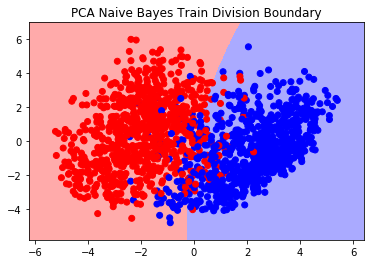

In [17]:
## Plot train division boundary - Bayes
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = d_X[:, 0].min() - 1, d_X[:, 0].max() + 1
y_min, y_max = d_X[:, 1].min() - 1, d_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = new_d_bayes.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(d_X[:, 0], d_X[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA Naive Bayes Train Division Boundary")

plt.show()

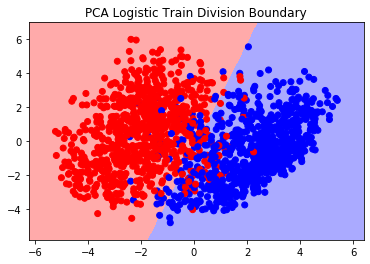

In [18]:
## Plot train division boundary - Logistic
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = d_X[:, 0].min() - 1, d_X[:, 0].max() + 1
y_min, y_max = d_X[:, 1].min() - 1, d_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = new_d_log.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(d_X[:, 0], d_X[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA Logistic Train Division Boundary")

plt.show()

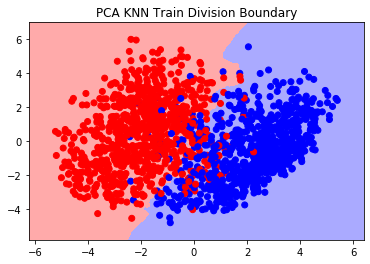

In [19]:
## Plot train division boundary - KNN
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = d_X[:, 0].min() - 1, d_X[:, 0].max() + 1
y_min, y_max = d_X[:, 1].min() - 1, d_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = new_d_knn.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(d_X[:, 0], d_X[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA KNN Train Division Boundary")

plt.show()

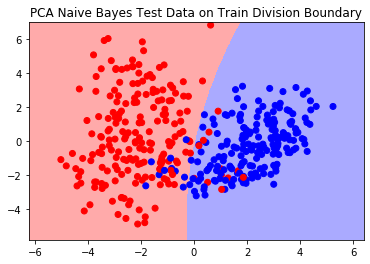

In [20]:
## Plot test data on train division boundary - Bayes
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = d_X[:, 0].min() - 1, d_X[:, 0].max() + 1
y_min, y_max = d_X[:, 1].min() - 1, d_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = new_d_bayes.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(d_X_t[:, 0], d_X_t[:, 1], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA Naive Bayes Test Data on Train Division Boundary")

plt.show()

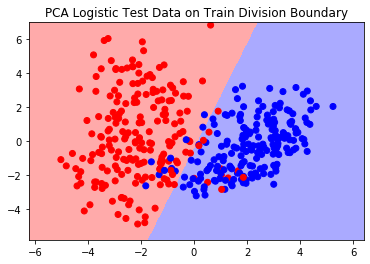

In [21]:
## Plot test data on train division boundary - Logistic
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = d_X[:, 0].min() - 1, d_X[:, 0].max() + 1
y_min, y_max = d_X[:, 1].min() - 1, d_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = new_d_log.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(d_X_t[:, 0], d_X_t[:, 1], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA Logistic Test Data on Train Division Boundary")

plt.show()

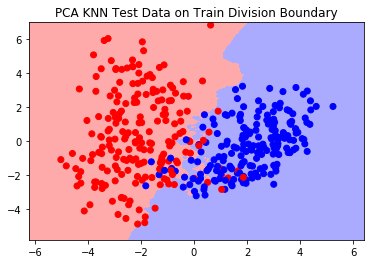

In [22]:
## Plot test data on train division boundary - KNN
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = d_X[:, 0].min() - 1, d_X[:, 0].max() + 1
y_min, y_max = d_X[:, 1].min() - 1, d_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = new_d_knn.predict(np.c_[xx.ravel(), yy.ravel()])

## Division Boundary
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot points
plt.scatter(d_X_t[:, 0], d_X_t[:, 1], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("PCA KNN Test Data on Train Division Boundary")

plt.show()

(1990, 2)


<Figure size 432x288 with 0 Axes>

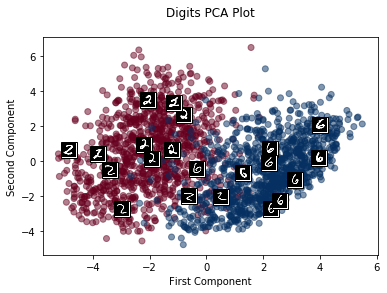

In [23]:
d_X = train_pca(digits)

print(d_X.shape)

selected = [506, 517, 43, 293, 1690, 1450, 25, 652, 422, 525, 542, 194, 633, 1989, 1900, 1500, 1000, 1032, 1400, 1033, 1040,1989]
#selected = range(1032)
plt.clf()
fig, ax = plt.subplots()

for i in selected:
        image = digits[i, :].reshape(28, 28).T

        imagebox = OffsetImage(image, cmap='gray', zoom=0.5)
        ab = AnnotationBbox(imagebox, d_X[i], pad=0.1)
        ax.add_artist(ab)

plt.scatter(d_X[:, 0], d_X[:, 1], alpha = .5, c = labels, cmap="RdBu")
plt.title("Digits PCA Plot\n")
plt.xlabel("First Component")
plt.ylabel("Second Component")

plt.show()